In [24]:
import locale
import pandas as pd
import sidrapy
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
data = sidrapy.get_table(table_code='7419',
                         territorial_level="3",
                         ibge_territorial_code="all",
                         variable="4705",
                         classifications={"680": "33216"})

In [26]:
df = pd.DataFrame(data)
#data.columns = data.iloc[0]
df = data.iloc[1:, [6 , 4, 12]]
print(df.head())

        D1N     V   D4N
1  Rondônia  1912  2021
2      Acre  2234  2021
3  Amazonas  1864  2021
4   Roraima  2208  2021
5      Pará  2180  2021


In [27]:
df.columns = ['Estado', 'Utilizaram Notebook', 'Ano']
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
df['Utilizaram Notebook'] = df['Utilizaram Notebook'].astype('float64')
df['Utilizaram Notebook'] = [locale.format_string('%d', pop, grouping=True) for pop in df['Utilizaram Notebook']]
print(df.head())

     Estado Utilizaram Notebook   Ano
1  Rondônia               1.912  2021
2      Acre               2.234  2021
3  Amazonas               1.864  2021
4   Roraima               2.208  2021
5      Pará               2.180  2021


In [28]:
df['Utilizaram Notebook'] = pd.to_numeric(df['Utilizaram Notebook'], errors='coerce')
mUsers = df.nlargest(5, 'Utilizaram Notebook')
print(mUsers.head())

               Estado  Utilizaram Notebook   Ano
27   Distrito Federal                3.802  2021
19     Rio de Janeiro                2.999  2021
20          São Paulo                2.811  2021
23  Rio Grande do Sul                2.649  2021
22     Santa Catarina                2.567  2021


<Axes: xlabel='Utilizaram Notebook', ylabel='Estado'>

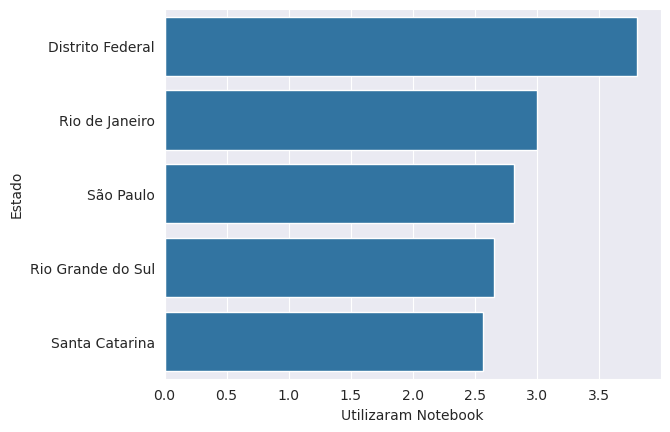

In [30]:
sns.barplot(x=mUsers['Utilizaram Notebook'], y=mUsers['Estado'], alpha=1.0)